In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

titanic_df = pd.read_csv("titanic_train.csv")
titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [3]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# NULL 컬럼들에 대한 처리

위의 결과를 보고 Age, Cabin, Embarked 컬럼에 NULL값이 있다는 것을 알게 되었고 이를 아래와 같이 처리해주었다.

In [4]:
titanic_df["Age"].fillna(titanic_df["Age"].mean(), inplace=True)
titanic_df["Cabin"].fillna('N', inplace=True)
titanic_df["Embarked"].fillna('N', inplace=True)
print("데이터 세트 NULL 값 개수:\n", titanic_df.isnull().sum())

데이터 세트 NULL 값 개수:
 PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


컬럼들의 값 분포도 알아본다.

In [5]:
print("Sex값 분포:\n", titanic_df["Sex"].value_counts())
print("\nCabin값 분포:\n", titanic_df["Cabin"].value_counts())
print("\nEmbarked값 분포:\n", titanic_df["Embarked"].value_counts())

Sex값 분포:
 male      577
female    314
Name: Sex, dtype: int64

Cabin값 분포:
 N              687
B96 B98          4
C23 C25 C27      4
G6               4
D                3
              ... 
D9               1
A23              1
D30              1
C47              1
B82 B84          1
Name: Cabin, Length: 148, dtype: int64

Embarked값 분포:
 S    644
C    168
Q     77
N      2
Name: Embarked, dtype: int64


Cabin 컬럼의 값의 분포가 너무 난잡해서 맨 앞 글자만을 저장하는 것으로 처리해준다.

In [6]:
titanic_df["Cabin"] = titanic_df["Cabin"].str[:1]
titanic_df["Cabin"].value_counts()

N    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: Cabin, dtype: int64

# 데이터에 대해 더 살펴보기

In [7]:
titanic_df.groupby(["Sex","Survived"])["Survived"].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

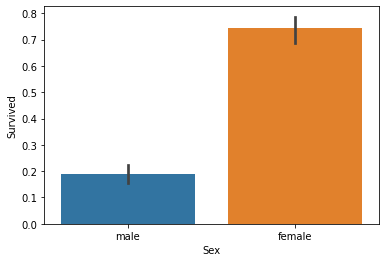

In [8]:
sns.barplot(x="Sex",y="Survived", data =titanic_df)

-> 오 남자의 생존율이 여성의 생존율보다 낮았었구나!

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

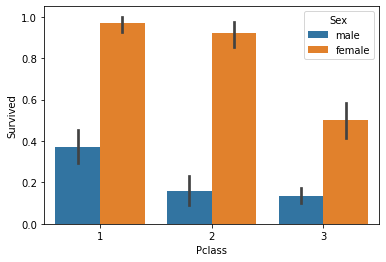

In [9]:
sns.barplot(x="Pclass",y="Survived",hue="Sex",data=titanic_df)

-> 등급이 낮을수록 더 생존율이 높구나!

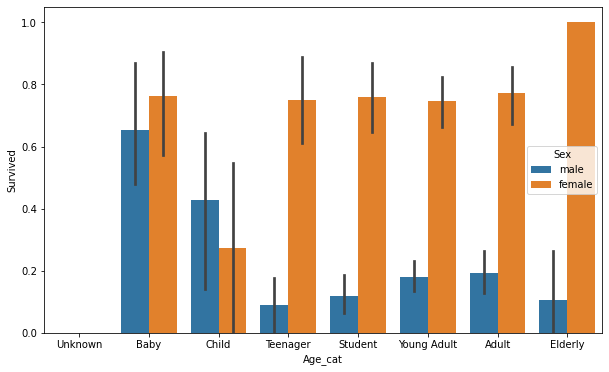

In [10]:
def get_category(age):
    if age<=-1:cat="Unknown"
    elif age<=5: cat="Baby"
    elif age<=12: cat="Child"
    elif age<=18: cat="Teenager"
    elif age<=25: cat="Student"
    elif age<=35: cat="Young Adult"
    elif age<=60: cat="Adult"
    else: cat="Elderly"
    
    return cat

# 막대그래프의 크기 figure를 더 크게 설정
plt.figure(figsize=(10,6))
# 순서를 만들어주기 위해
group_names = ["Unknown","Baby","Child","Teenager","Student","Young Adult","Adult","Elderly"]
# 새 칼럼 Age_cat 만들기
titanic_df["Age_cat"]= titanic_df["Age"].apply(lambda x:get_category(x))
# 그래프 그리기
sns.barplot(x="Age_cat", y="Survived", hue = "Sex",data=titanic_df, order = group_names)
# 추가했던 칼럼 삭제
titanic_df.drop("Age_cat",axis=1, inplace=True)

# 레이블 인코딩 

In [11]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Sex, Cabin, Embarked 칼럼의 데이터 타입이 object이므로 인코딩 해줘야 겠다

In [12]:
from sklearn.preprocessing import LabelEncoder

def encode_features(dataDF):
    features = ["Sex","Cabin","Embarked"]
    for feature in features:
        encoder = LabelEncoder()
        encoder.fit(dataDF[feature])
        dataDF[feature] = encoder.transform(dataDF[feature])
    return dataDF

titanic_df = encode_features(titanic_df)

# 지금까지 했던 거 다 함수로 정리

In [13]:
# NULL 처리 함수
def fillna(df):
    df["Age"].fillna(df["Age"].mean(), inplace=True)
    df["Cabin"].fillna('N', inplace=True)
    df["Embarked"].fillna('N', inplace=True)
    df["Fare"].fillna(0, inplace=True)
    return df

# 불필요한 칼럼 삭제
def drop_features(df):
    df.drop(["Name","Ticket","PassengerId"], axis=1, inplace=True)
    return df

# 레이블 인코딩 
def format_features(df):
    df["Cabin"] = df["Cabin"].str[:1]
    features = ["Sex","Cabin","Embarked"]
    for feature in features:
        encoder = LabelEncoder()
        encoder.fit(df[feature])
        df[feature] = encoder.transform(df[feature])
    return df

# 위 세 함수 한꺼번에 실행
def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df

# 학습 및 예측

In [14]:
titanic_df = pd.read_csv("titanic_train.csv")
# 레이블 데이터 셋 추출
y_titanic_df = titanic_df["Survived"]
# feature 데이터 셋 추출
X_titanic_df = titanic_df.drop("Survived", axis=1)
# 만들어둔 함수를 feature 데이터 셋 적용
X_titanic_df = transform_features(X_titanic_df)

In [15]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_titanic_df, y_titanic_df, 
                                                 test_size=0.2, random_state=49) 

In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# 결정트리, Random Forest, 로지스틱 회귀 사용해서 학습 및 예측

dt_clf = DecisionTreeClassifier(random_state=11)
rf_clf = RandomForestClassifier(random_state=11)
lr_clf = LogisticRegression(max_iter=1000)

# 결정트리 학습/예측/평가
dt_clf.fit(X_train,y_train)
dt_pred = dt_clf.predict(X_test)
print("DecisionTreeClassifer 정확도 : {0:.4f}".format(accuracy_score(dt_pred, y_test)))

# Rancom Forest 학습/예측/평가
rf_clf.fit(X_train,y_train)
rf_pred = rf_clf.predict(X_test)
print("RandomForestClassifier 정확도 : {0:.4f}".format(accuracy_score(rf_pred, y_test)))

# 로지스틱 회귀 학습/예측/평가
lr_clf.fit(X_train,y_train)
lr_pred = lr_clf.predict(X_test)
print("LogisticRegression 정확도 : {0:.4f}".format(accuracy_score(lr_pred, y_test)))


DecisionTreeClassifer 정확도 : 0.8156
RandomForestClassifier 정확도 : 0.8324
LogisticRegression 정확도 : 0.8268


# 교차검증

In [25]:
from sklearn.model_selection import KFold

def exec_kfold(clf,folds=5):
    kfold= KFold(n_splits=folds)
    scores=[]
    
    for iter_count, (train_index, test_index) in enumerate(kfold.split(X_titanic_df)):
        # values 이용해서 ndarray 형태로 만들어주기
        X_train,X_test = X_titanic_df.values[train_index], X_titanic_df.values[test_index]
        y_train,y_test = y_titanic_df.values[train_index], y_titanic_df.values[test_index]
        
        clf.fit(X_train,y_train)
        pred = clf.predict(X_test)
        accuracy = accuracy_score(pred, y_test)
        scores.append(accuracy)
        print("교차 검증 {0} 정확도 : {1:.4f}".format(iter_count, accuracy))
        
    mean_score = np.mean(scores)
    print("평균 정확도 : {0:.4f}".format(mean_score))
    
# 결정트리로 함수 호출
exec_kfold(dt_clf, folds=5)

교차 검증 0 정확도 : 0.7542
교차 검증 1 정확도 : 0.7809
교차 검증 2 정확도 : 0.7865
교차 검증 3 정확도 : 0.7697
교차 검증 4 정확도 : 0.8202
평균 정확도 : 0.7823


In [30]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(dt_clf, X_titanic_df, y_titanic_df, scoring="accuracy", cv=5)
for iter_count, accuracy in enumerate(scores):
    print("교차 검증 {0} 정확도 : {1:.4f}".format(iter_count, accuracy))
print("평균 정확도 : {0:.4f}".format(np.mean(scores)))

교차 검증 0 정확도 : 0.7430
교차 검증 1 정확도 : 0.7753
교차 검증 2 정확도 : 0.7921
교차 검증 3 정확도 : 0.7865
교차 검증 4 정확도 : 0.8427
평균 정확도 : 0.7879


In [32]:
from sklearn.model_selection import GridSearchCV

parameters = {"max_depth":[2,3,5,10],"min_samples_split":[2,3,5],
             "min_samples_leaf":[1,5,8]}
grid_dclf = GridSearchCV(dt_clf, param_grid = parameters, scoring="accuracy", cv=5)
grid_dclf.fit(X_train, y_train)

print("GridSearCV 최적 하이퍼 파라미터 :",grid_dclf.best_params_ )
print("GridSearCV 최고 정확도 : {0:.4f}".format(grid_dclf.best_score_))
# 최적 하이퍼 파라미터로 estimator 학습해놓음
best_dclf = grid_dclf.best_estimator_

pred = best_dclf.predict(X_test)
accuracy = accuracy_score(pred, y_test)
print("테스트 세트에서의 DecisionTreeClassifier 정확도 : {0:.4f}".format(accuracy))

GridSearCV 최적 하이퍼 파라미터 : {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
GridSearCV 최고 정확도 : 0.8118
테스트 세트에서의 DecisionTreeClassifier 정확도 : 0.8268
